In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_netflix_2019 = pd.read_csv('netflix_titles.csv')

In [3]:
#checking the data type of each column with the .dtypes
df_netflix_2019.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
df_netflix_2019.shape

(7787, 12)

In [5]:
#Identifying missing data using .isnull() and .sum() methods
df_netflix_2019.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
#Identifying missing data using .isnull() & .sum() methods and then using .sort_values(ascending = False) to sort it by the highest to the lowest result.
df_netflix_2019.isnull().sum().sort_values(ascending = False)

director        2389
cast             718
country          507
date_added        10
rating             7
description        0
listed_in          0
duration           0
release_year       0
title              0
type               0
show_id            0
dtype: int64

In [7]:
#You can  also represent the missing values in percentages
for column in df_netflix_2019.columns:
    percentage = df_netflix_2019[column].isnull().mean()
    print (f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 30.68%
cast: 9.22%
country: 6.51%
date_added: 0.13%
release_year: 0.0%
rating: 0.09%
duration: 0.0%
listed_in: 0.0%
description: 0.0%


The above showed that data for a lot of directors were omitted or are missing.

In [8]:
df_netflix_2019.dropna(subset=['director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [10]:
df_movie = df_netflix_2019[df_netflix_2019['type']=='Movie']
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)',expand= False).astype(int))

In [12]:
df_movie.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",95


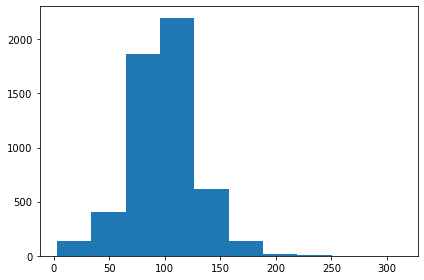

In [17]:
#using histogram to recognise outliers
fig, ax = plt.subplots(nrows= 1,ncols = 1)
plt.hist(df_movie['minute'])
fig.tight_layout()
plt.show()

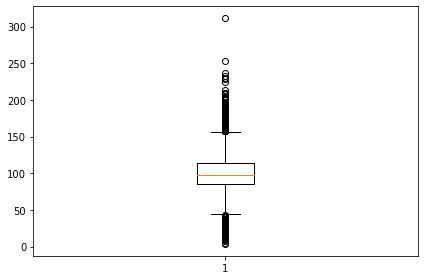

In [19]:
#using boxplots to determine outliers
fig, ax = plt.subplots(nrows = 1,ncols = 1)
ax = ax.boxplot(x = df_movie['minute'])
fig.tight_layout()
plt.show()

In [20]:
#We can further identify  some elements of the boxplot, like the lowe and upper quartile using the .describe() method
df_movie['minute'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In [25]:
#u can easily display all elements of the boxplot and even make it interactive with Plotly.
import plotly.graph_objects as go
from plotly.offline import iplot,init_notebook_mode

fig = go.Figure()
fig.add_box (x=df_movie['minute'], text = df_movie['minute'])
iplot(fig)

ModuleNotFoundError: No module named 'plotly'

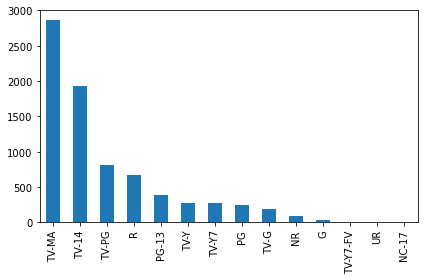

In [26]:
#Using bars to identify outliers within categorical data
#we can use pandas to make the bar charts

fig = df_netflix_2019['rating'].value_counts().plot.bar().get_figure()
fig.tight_layout()

TypeError: 'value' must be an instance of str or bytes, not a float

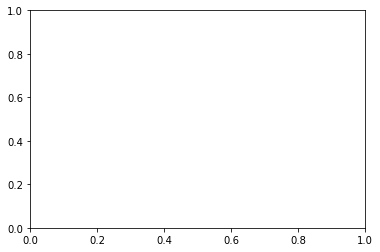

In [34]:
#Using bars to identify outliers within categorical data
#we can use matplotlib to make the bar charts
plt.bar(x= df_netflix_2019['rating'],height= 0.5 )
plt.show()

In [38]:
#Dealing with Outliers
#Once we identified the outliers, we can easily filter them out by using Python’s operators

df_movie =df_movie[(df_movie['minute']> 43) & (df_movie[df_movie['rating']<158)]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-38-71de69e49c3c>, line 4)